# Imports


In [ ]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import pandas as pd 
import numpy as np
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
import matplotlib.pyplot as graphic
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving adult.csv to adult.csv


# Tratamento dos dados

In [ ]:
base_idade = pd.read_csv('adult.csv')

In [ ]:
base_idade.shape

(32561, 15)

In [ ]:
nulos = base_idade.isnull()
print(nulos)

         age  workclass  fnlwgt  ...  hours-per-week  native-country  income
0      False      False   False  ...           False           False   False
1      False      False   False  ...           False           False   False
2      False      False   False  ...           False           False   False
3      False      False   False  ...           False           False   False
4      False      False   False  ...           False           False   False
...      ...        ...     ...  ...             ...             ...     ...
32556  False      False   False  ...           False           False   False
32557  False      False   False  ...           False           False   False
32558  False      False   False  ...           False           False   False
32559  False      False   False  ...           False           False   False
32560  False      False   False  ...           False           False   False

[32561 rows x 15 columns]


In [ ]:
qtdnulos = base_idade.isnull().sum()
print(qtdnulos)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [ ]:
base_idade.rename(columns={"Age": "Idade", "workclass": "Classe de trabalho", "education": "Escolaridade", "Marital-status": "Estado", "occupation": "Profissão", "relationship": "Relacionamento", "race": "Raça", "sex": "Genero", "Hours-per-week": "Horas por semana", "Native-country": "País de Origem", "income": "Renda"})   

,age,Classe de trabalho,fnlwgt,Escolaridade,education-num,marital-status,Profissão,Relacionamento,Raça,Genero,capital-gain,capital-loss,hours-per-week,native-country,Renda
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Árvore Decisão

In [ ]:
min_age = 60
max_age = 80
df = pd.read_csv('adult.csv', sep=',')
df = df[(df.astype(str) != ' ?').all(axis=1)]
df['age_bi'] = np.where(((df['age'] >= min_age) & (df['age'] < max_age)), 1, 0)

df = df.drop(['age', 'fnlwgt','capital-gain','capital-loss','native-country', 'workclass', 'occupation', 'race', 'sex'], axis=1)
df = pd.get_dummies(df, columns=['income', 'education', 'marital-status', 'relationship'])

df = df.sample(frac=1)

d_train = df[:25000]
d_test = df[25000:]
d_train_att = d_train.drop(['age_bi'], axis=1)
d_train_gt50 = d_train['age_bi']
d_test_att = d_test.drop(['age_bi'], axis=1)
d_test_gt50 = d_test['age_bi']
d_att = df.drop(['age_bi'], axis=1)
d_gt50 = df['age_bi']

print("Idade entre %d e %d anos: %d de %d (%.2f%%)" % (min_age, max_age, np.sum(d_gt50), len(d_gt50), 100*float(np.sum(d_gt50)) / len(d_gt50)))

t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9)
t = t.fit(d_train_att, d_train_gt50)

dot_data = tree.export_graphviz(t, out_file=None, label='all', impurity=False, proportion=True, 
                               feature_names=list(d_train_att), class_names=['lt25', 'gt25'],
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
print(graph.render())

t.score(d_test_att, d_test_gt50)

scores = cross_val_score(t, d_att, d_gt50, cv=5)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

df.iloc[[0]].to_csv('age-prediction.csv', sep=',', encoding='utf-8', index=False)

sample_df = pd.read_csv('age-prediction.csv', sep=',')
sample_df = sample_df.drop(['age_bi'], axis=1)

predict_value = sample_df.iloc[0]
y_predict = t.predict([predict_value.tolist()])

predictions = t.predict(d_test_att)
print(classification_report(d_test_gt50,predictions))
conf_mat = confusion_matrix(d_test_gt50, predictions)
print(conf_mat)

for max_depth in range(1, 10):
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_gt50, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))


Idade entre 60 e 80 anos: 1991 de 30162 (6.60%)
Source.gv.pdf
Accuracy: 0.94 (+/- 0.00)
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4823
           1       0.56      0.19      0.28       339

    accuracy                           0.94      5162
   macro avg       0.75      0.59      0.62      5162
weighted avg       0.92      0.94      0.92      5162

[[4773   50]
 [ 276   63]]
Max depth: 1, Accuracy: 0.93 (+/- 0.00)
Max depth: 2, Accuracy: 0.94 (+/- 0.00)
Max depth: 3, Accuracy: 0.94 (+/- 0.00)
Max depth: 4, Accuracy: 0.94 (+/- 0.00)
Max depth: 5, Accuracy: 0.94 (+/- 0.00)
Max depth: 6, Accuracy: 0.94 (+/- 0.00)
Max depth: 7, Accuracy: 0.94 (+/- 0.00)
Max depth: 8, Accuracy: 0.94 (+/- 0.00)
Max depth: 9, Accuracy: 0.94 (+/- 0.00)


# Regressão Logística

In [ ]:
min_age = 60
max_age = 90
df = pd.read_csv('adult.csv', sep=',')
df = df[(df.astype(str) != ' ?').all(axis=1)]
df['age_bi'] = np.where(((df['age'] >= min_age) & (df['age'] < max_age)), 1, 0)

df = df.drop(['age', 'fnlwgt', 'workclass', 'capital-gain','capital-loss','native-country', 'income', 'occupation', 'race', 'sex', 'education-num', 'hours-per-week'], axis=1)
df = pd.get_dummies(df, columns=['education', 'marital-status', 'relationship'])

df = df.sample(frac=1)

d_train = df[:25000]
d_test = df[25000:]
d_train_att = d_train.drop(['age_bi'], axis=1)
d_train_gt50 = d_train['age_bi']
d_test_att = d_test.drop(['age_bi'], axis=1)
d_test_gt50 = d_test['age_bi']
d_att = df.drop(['age_bi'], axis=1)
d_gt50 = df['age_bi']

In [ ]:
#Variáveis de treino
logmodel = LogisticRegression(solver='lbfgs',max_iter=1000)
logmodel.fit(d_train_att,d_train_gt50)

predictions = logmodel.predict(d_train_att)
print(classification_report(d_train_gt50,predictions))
conf_mat = confusion_matrix(d_train_gt50, predictions)
print(conf_mat)



              precision    recall  f1-score   support

           0       0.94      0.99      0.97     23292
           1       0.59      0.12      0.20      1708

    accuracy                           0.93     25000
   macro avg       0.77      0.56      0.58     25000
weighted avg       0.92      0.93      0.91     25000

[[23151   141]
 [ 1503   205]]
A acurácia do modelo de Regressão Logística foi 93.68%


In [ ]:
#Variáveis de teste
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(d_test_att,d_test_gt50)

predictions = logmodel.predict(d_test_att)
print(classification_report(d_test_gt50,predictions))
conf_mat = confusion_matrix(d_test_gt50, predictions)
print(conf_mat)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4932
           1       0.78      0.40      0.52       230

    accuracy                           0.97      5162
   macro avg       0.88      0.70      0.75      5162
weighted avg       0.96      0.97      0.96      5162

[[4906   26]
 [ 139   91]]


In [ ]:
EXEMPLO = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]).reshape((1, -1))
print("EXEMPLO: {}".format(logmodel.predict(EXEMPLO)[0]))

EXEMPLO: 1


In [ ]:
EXEMPLO = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]).reshape((1,-1))
print("EXEMPLO: {}".format(logmodel.predict(EXEMPLO)[0]))

EXEMPLO: 1


In [ ]:
EXEMPLO = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]).reshape((1,-1))
print("EXEMPLO: {}".format(logmodel.predict(EXEMPLO)[0]))

EXEMPLO: 0


In [ ]:
EXEMPLO = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]).reshape((1,-1))
print("EXEMPLO: {}".format(logmodel.predict(EXEMPLO)[0]))

EXEMPLO: 0


# Testes 0 - 20 anos


In [ ]:
df.sort_values(by=['age_bi'], ascending=False).head(10)

,age_bi,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
25325,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
635,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9611,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
26921,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
21001,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
10588,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
953,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
11855,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
26052,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
28992,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
# Predição se está na faixa de 0 a 20 anos
# Dados obtidos do dataframe acima, com a coluna age_bi removida

data = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]]


for i in data:
  EXEMPLO = np.array(i).reshape((1, -1))
  print("Resultado: {}".format(logmodel.predict(EXEMPLO)[0]))

Resultado: 0
Resultado: 1
Resultado: 1
Resultado: 1
Resultado: 0
Resultado: 1
Resultado: 0
Resultado: 0
Resultado: 1
Resultado: 1


In [ ]:
df.sort_values(by=['age_bi'], ascending=True).head(10)

,age_bi,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
12811,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
10261,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
19659,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
16433,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
8496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
30746,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3434,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1837,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
6228,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
15409,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Predição se NÃO está na faixa de 0 a 20 anos
# Dados obtidos do dataframe acima, com a coluna age_bi removida

data = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]

for i in data:
  EXEMPLO = np.array(i).reshape((1, -1))
  print("Resultado: {}".format(logmodel.predict(EXEMPLO)[0]))

Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0


### Resultado: 
Faixa de 0 a 20 anos
*   0 = Não está na faixa
*   1 = Está na faixa


# Testes 60 - 80 anos


In [ ]:
# Define intervalo de idade entre 60 e 80 anos
min_age = 60
max_age = 80
df = pd.read_csv('adult.csv', sep=',')
df = df[(df.astype(str) != ' ?').all(axis=1)]
df['age_bi'] = np.where(((df['age'] >= min_age) & (df['age'] < max_age)), 1, 0)

df = df.drop(['age', 'fnlwgt', 'workclass', 'capital-gain','capital-loss','native-country', 'income', 'occupation', 'race', 'sex', 'education-num', 'hours-per-week'], axis=1)
df = pd.get_dummies(df, columns=['education', 'marital-status', 'relationship'])

df = df.sample(frac=1)

d_train = df[:25000]
d_test = df[25000:]
d_train_att = d_train.drop(['age_bi'], axis=1)
d_train_gt50 = d_train['age_bi']
d_test_att = d_test.drop(['age_bi'], axis=1)
d_test_gt50 = d_test['age_bi']
d_att = df.drop(['age_bi'], axis=1)
d_gt50 = df['age_bi']

In [ ]:
#Variáveis de treino
logmodel = LogisticRegression(solver='lbfgs',max_iter=1000)
logmodel.fit(d_train_att,d_train_gt50)

predictions = logmodel.predict(d_train_att)
print(classification_report(d_train_gt50,predictions))
conf_mat = confusion_matrix(d_train_gt50, predictions)
print(conf_mat)

#Variáveis de teste
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(d_test_att,d_test_gt50)

predictions = logmodel.predict(d_test_att)
print(classification_report(d_test_gt50,predictions))
conf_mat = confusion_matrix(d_test_gt50, predictions)
print(conf_mat)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     23332
           1       0.55      0.09      0.15      1668

    accuracy                           0.93     25000
   macro avg       0.74      0.54      0.56     25000
weighted avg       0.91      0.93      0.91     25000

[[23210   122]
 [ 1519   149]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4839
           1       0.57      0.13      0.21       323

    accuracy                           0.94      5162
   macro avg       0.76      0.56      0.59      5162
weighted avg       0.92      0.94      0.92      5162

[[4808   31]
 [ 282   41]]


In [ ]:
df.sort_values(by=['age_bi'], ascending=False).head(10)

,age_bi,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
24270,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2956,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
12932,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
17045,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
794,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
5743,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3854,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
30779,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
18662,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
24337,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Predição se está na faixa de 60 a 80 anos
# Dados obtidos do dataframe acima, com a coluna age_bi removida
data = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]]

for i in data:
  EXEMPLO = np.array(i).reshape((1, -1))
  print("Resultado: {}".format(logmodel.predict(EXEMPLO)[0]))

Resultado: 1
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 1


In [ ]:
df.sort_values(by=['age_bi'], ascending=True).head(10)

,age_bi,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
9210,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
30256,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
10553,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
28840,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
10031,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5883,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
820,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
13491,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
19293,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
10063,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
# Predição se NÃO está na faixa de 60 a 80 anos
# Dados obtidos do dataframe acima, com a coluna age_bi removida
data = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]]

for i in data:
  EXEMPLO = np.array(i).reshape((1, -1))
  print("Resultado: {}".format(logmodel.predict(EXEMPLO)[0]))

Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0
Resultado: 0



Resultado:

Faixa de 60 a 80 anos

*   0 = Não está na faixa
*   1 = Está na faixa



# Técnica KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
# Treinando o modelo usando os ajustes de treinamento.
modelo.fit(d_train_att,d_train_gt50)
#Predito
predito = modelo.predict(d_train_att)
print(predito)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
# Treinando o modelo usando os ajustes de treinamento.
modelo.fit(d_train_att,d_train_gt50)
#Predito
predito = modelo.predict(d_train_att)
print(predito)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier(n_neighbors=7, metric='chebyshev')
# Treinando o modelo usando os ajustes de treinamento.
modelo.fit(d_train_att,d_train_gt50)
#Predito
predito = modelo.predict(d_train_att)
print(predito)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier(n_neighbors=9, metric='minkowski')
# Treinando o modelo usando os ajustes de treinamento.
modelo.fit(d_train_att,d_train_gt50)
#Predito
predito = modelo.predict(d_train_att)
print(predito)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier(n_neighbors=5, metric='minkowski', algorithm='kd_tree')
# Treinando o modelo usando os ajustes de treinamento.
modelo.fit(d_train_att,d_train_gt50)
#Predito
predito = modelo.predict(d_train_att)
print(predito)

[0 0 0 ... 0 0 0]


# NAIVE BAYES

In [ ]:
#Importa a biblioteca do modelo Naive Bayes Gaussiano
from sklearn.naive_bayes import GaussianNB
import numpy as np
#Cria um classificador Gaussiano
modelo = GaussianNB()
# Treinando o modelo usando os ajustes de treinamento.
modelo.fit(d_train_att,d_train_gt50)
#Predito
predito = modelo.predict(d_train_att)
print(predito)
 
y_pred = modelo.predict(d_test_att)
print(classification_report(d_test_gt50, y_pred))

[0 0 1 ... 0 1 1]
              precision    recall  f1-score   support

           0       0.98      0.42      0.59      4823
           1       0.10      0.91      0.18       339

    accuracy                           0.45      5162
   macro avg       0.54      0.66      0.38      5162
weighted avg       0.93      0.45      0.56      5162



In [ ]:
#Importa a biblioteca do modelo Naive Bayes Gaussiano
from sklearn.naive_bayes import MultinomialNB
import numpy as np
#Cria um classificador Gaussiano
modelo = MultinomialNB()
# Treinando o modelo usando os ajustes de treinamento.
modelo.fit(d_train_att,d_train_gt50)
#Predito
predito = modelo.predict(d_train_att)
print(predito)
 
y_pred = modelo.predict(d_test_att)
print(classification_report(d_test_gt50, y_pred))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4823
           1       0.56      0.04      0.08       339

    accuracy                           0.93      5162
   macro avg       0.75      0.52      0.52      5162
weighted avg       0.91      0.93      0.91      5162



In [ ]:
#Importa a biblioteca do modelo Naive Bayes Gaussiano
from sklearn.naive_bayes import MultinomialNB
import numpy as np
#Cria um classificador Gaussiano
modelo = MultinomialNB()
# Treinando o modelo usando os ajustes de treinamento.
modelo.fit(d_train_att,d_train_gt50)
#Predito
predito = modelo.predict(d_train_att)
print(predito)
 
y_pred = modelo.predict(d_test_att)
print(classification_report(d_test_gt50, y_pred))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4823
           1       0.56      0.04      0.08       339

    accuracy                           0.93      5162
   macro avg       0.75      0.52      0.52      5162
weighted avg       0.91      0.93      0.91      5162



In [ ]:
# Modelo 1 classificador Gaussiano
from sklearn.naive_bayes import GaussianNB
# instanciando o modelo
modelo1 = GaussianNB()
# treinando o modelo utilizando o conjunto de treino
modelo1.fit(d_train_att, d_train_gt50)
# validando o modelo utilizando o conjunto de teste
precisao1 = str(round(modelo1.score(d_test_att, d_test_gt50) * 100, 2))+"%"
# imprimindo o resultado
print("A acurácia do modelo 1 foi",precisao1)
 
y_pred = modelo1.predict(d_test_att)
print(classification_report(d_test_gt50, y_pred))

A acurácia do modelo 1 foi 45.02%
              precision    recall  f1-score   support

           0       0.98      0.42      0.59      4823
           1       0.10      0.91      0.18       339

    accuracy                           0.45      5162
   macro avg       0.54      0.66      0.38      5162
weighted avg       0.93      0.45      0.56      5162



In [ ]:
# Modelo 2 classificador Multinomial
from sklearn.naive_bayes import MultinomialNB
# instanciando o modelo
modelo2 = MultinomialNB()
# treinando o modelo utilizando o conjunto de treino
modelo2.fit(d_train_att, d_train_gt50)
# validando o modelo utilizando o conjunto de teste
precisao2 = str(round(modelo2.score(d_test_att, d_test_gt50) * 100, 2))+"%"
# imprimindo o resultado
print("A acurácia do modelo 2 foi",precisao2)
 
y_pred = modelo2.predict(d_test_att)
print(classification_report(d_test_gt50, y_pred))

A acurácia do modelo 2 foi 93.49%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4823
           1       0.56      0.04      0.08       339

    accuracy                           0.93      5162
   macro avg       0.75      0.52      0.52      5162
weighted avg       0.91      0.93      0.91      5162



In [ ]:
# Modelo 3 classificador Bernoulli
from sklearn.naive_bayes import BernoulliNB
# instanciando o modelo
modelo3 = BernoulliNB()
# treinando o modelo utilizando o conjunto de treino
modelo3.fit(d_train_att, d_train_gt50)
# validando o modelo utilizando o conjunto de teste
precisao3 = str(round(modelo3.score(d_test_att, d_test_gt50) * 100, 2))+"%"
# imprimindo o resultado
print("A acurácia do modelo 3 foi",precisao3)
 
 
y_pred = modelo3.predict(d_test_att)
print(classification_report(d_test_gt50, y_pred))

A acurácia do modelo 3 foi 93.24%
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4823
           1       0.44      0.12      0.18       339

    accuracy                           0.93      5162
   macro avg       0.69      0.55      0.57      5162
weighted avg       0.91      0.93      0.91      5162



In [ ]:
# REQUISITOS PARA EXECUTAR QUALQUER TECNICA ONDE ELE SEPARA O QUE VAI SER TESTE E O QUE SERÁ TREINO, TAMBÉM A IDADE MINIMA E MAXIMA
 
min_age = 60
max_age = 90
df = pd.read_csv('adult.csv', sep=',')
df = df[(df.astype(str) != ' ?').all(axis=1)]
df['age_bi'] = np.where(((df['age'] >= min_age) & (df['age'] < max_age)), 1, 0)
 
df = df.drop(['age', 'fnlwgt', 'workclass', 'capital-gain','capital-loss','native-country', 'income', 'occupation', 'race', 'sex', 'education-num', 'hours-per-week'], axis=1)
df = pd.get_dummies(df, columns=['education', 'marital-status', 'relationship'])
 
df = df.sample(frac=1)
 
d_train = df[:25000]
d_test = df[25000:]
d_train_att = d_train.drop(['age_bi'], axis=1)
d_train_gt50 = d_train['age_bi']
d_test_att = d_test.drop(['age_bi'], axis=1)
d_test_gt50 = d_test['age_bi']
d_att = df.drop(['age_bi'], axis=1)
d_gt50 = df['age_bi']

In [ ]:
# instanciando o modelo
modeloKNN = KNeighborsClassifier()
# treinando o modelo utilizando o conjunto de treino
modeloKNN.fit(d_test_att,d_test_gt50)
# validando o modelo utilizando o conjunto de teste
precisaoKNN = str(round(modeloKNN.score(d_test_att, d_test_gt50) * 100, 2))+"%"
# imprimindo o resultado
print("A acurácia do modelo k-NN foi",precisaoKNN)
# predizendo o teste
y_pred = modeloKNN.predict(d_test_att)
# comparando predição com o real
 
print(classification_report(d_test_gt50, y_pred))
 
#Importa a biblioteca do modelo Naive Bayes Gaussiano
from sklearn.naive_bayes import GaussianNB
#Cria um classificador Gaussiano
modeloNB = GaussianNB()
# Treinando o modelo usando os ajustes de treinamento.
modeloNB.fit(d_train_att, d_train_gt50)
# validando o modelo utilizando o conjunto de teste
 
precisaoNB = str(round(modeloNB.score(d_test_att, d_test_gt50) * 100, 2))+"%"
# imprimindo o resultado
print("A acurácia do modelo Naive Bayes foi",precisaoNB)
# predizendo o teste
y_pred = modeloNB.predict(d_test_att)
# comparando predição com o real
 
print(classification_report(d_test_gt50, y_pred))
 
# normalizando
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(d_test_att)
d_test_att = scaler.transform(d_test_att)
scoresKNN = []
scoresNB = []

A acurácia do modelo k-NN foi 93.16%
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4811
           1       0.49      0.14      0.22       351

    accuracy                           0.93      5162
   macro avg       0.72      0.57      0.59      5162
weighted avg       0.91      0.93      0.91      5162

A acurácia do modelo Naive Bayes foi 46.67%
              precision    recall  f1-score   support

           0       0.98      0.44      0.60      4811
           1       0.10      0.87      0.18       351

    accuracy                           0.47      5162
   macro avg       0.54      0.65      0.39      5162
weighted avg       0.92      0.47      0.58      5162



Média do KNN: 25.77%
Desvio padrão do KNN: 0.00%
Média do Naive Bayes: 25.77%
Desvio padrão do Naive Bayes: 0.00%


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


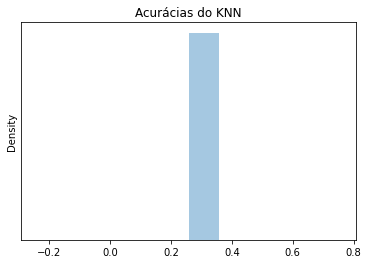

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


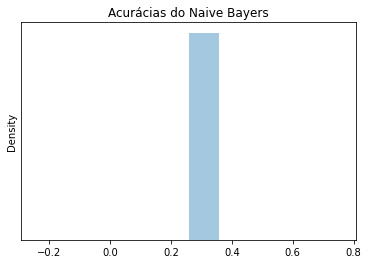

In [ ]:
for i in range(100):
  modeloKNN = KNeighborsClassifier()
  modeloKNN.fit(d_train_att, d_train_gt50)
  precisaoKNN = modeloNB.score(d_test_att, d_test_gt50)
  scoresKNN.append(precisaoKNN)
  modeloNB = GaussianNB()
  modeloNB.fit(d_train_att, d_train_gt50)
  precisaoNB = modeloNB.score(d_test_att, d_test_gt50)
  scoresNB.append(precisaoNB)
 
print("Média do KNN: {:.2f}%".format(np.mean(scoresKNN)*100))
print("Desvio padrão do KNN: {:.2f}%".format(np.std(scoresKNN)*100))
print("Média do Naive Bayes: {:.2f}%".format(np.mean(scoresNB)*100))
print("Desvio padrão do Naive Bayes: {:.2f}%".format(np.std(scoresNB)*100))
 
sns.distplot(scoresKNN)
plt.yticks([])
plt.title("Acurácias do KNN")
plt.show()
sns.distplot(scoresNB)
plt.yticks([])
plt.title("Acurácias do Naive Bayers")
plt.show()

# Redes Neurais


In [ ]:
# REQUISITOS PARA EXECUTAR QUALQUER TECNICA ONDE ELE SEPARA O QUE VAI SER TESTE E O QUE SERÁ TREINO, TAMBÉM A IDADE MINIMA E MAXIMA

min_age = 60
max_age = 90
df = pd.read_csv('adult.csv', sep=',')
df = df[(df.astype(str) != ' ?').all(axis=1)]
df['age_bi'] = np.where(((df['age'] >= min_age) & (df['age'] < max_age)), 1, 0)

df = df.drop(['age', 'fnlwgt', 'workclass', 'capital-gain','capital-loss','native-country', 'income', 'occupation', 'race', 'sex', 'education-num', 'hours-per-week'], axis=1)
df = pd.get_dummies(df, columns=['education', 'marital-status', 'relationship'])

df = df.sample(frac=1)

d_train = df[:25000]
d_test = df[25000:]
d_train_att = d_train.drop(['age_bi'], axis=1)
d_train_gt50 = d_train['age_bi']
d_test_att = d_test.drop(['age_bi'], axis=1)
d_test_gt50 = d_test['age_bi']
d_att = df.drop(['age_bi'], axis=1)
d_gt50 = df['age_bi']

In [ ]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

# Carregamos os dados do conjunto de dados MNIST do pacote Keras
(d_train_att, d_train_gt50), (d_test_att,d_test_gt50) = mnist.load_data()
X_test_copy = d_test_att
y_test_copy = d_test_att

# Redimensionamos os dados e fazemos cast para float32
d_train_att = d_train_att.reshape(60000, 784).astype('float32')
d_test_att = d_test_att.reshape(10000, 784).astype('float32')

# Normalizamos os dados entre 0 e 1 (Dividimos pelo maximo)
d_train_att /= 255
d_test_att /= 255

# Convertemos de vetores de classes para matrizes binárias de classes.
d_train_gt50 = np_utils.to_categorical(d_train_gt50, 10)
d_test_gt50 = np_utils.to_categorical(d_test_gt50, 10)

In [ ]:
model = Sequential()
model.add(Dense(units=512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(units=512))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

#Imprimimos o modelo no console
model.summary()
#Compilamos/Criamos o modelo
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
#Executamos o treinamento
history = model.fit(d_train_att, d_train_gt50, batch_size=128, verbose=1, validation_data=(d_test_att,d_test_gt50))
#Testamos o modelo e imprimimos o resultado
score = model.evaluate(d_test_att,d_test_gt50, verbose=0)
print('Score:', score[0])
print('Accuracy:', score[1])
# salve o modelo treinado e a arquitetura da rede para um único arquivo
model.save("model.h5")
print('Modelo salvo no disco')



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_18 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_19 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                5130      
_________________________________________________________________
activation_20 (Activation)   (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________